# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
dataset = pd.read_csv('nse_sensex.csv')

In [3]:
#Read dataset
dataset.head()

DATE      SYMBOL SERIES  PREV CLOSE   OPEN    HIGH    LOW   LAST  \
0  2016-01-01  ASIANPAINT     EQ      883.55  882.0  885.60  876.9  879.7   
1  2016-01-04  ASIANPAINT     EQ      878.75  876.2  892.45  871.7  880.5   
2  2016-01-05  ASIANPAINT     EQ      880.80  881.3  905.00  881.3  901.4   
3  2016-01-06  ASIANPAINT     EQ      900.65  904.5  911.90  884.0  885.3   
4  2016-01-07  ASIANPAINT     EQ      886.40  883.0  891.55  869.0  871.1   

    CLOSE    VWAP   VOLUME      TURNOVER  TRADES  DELIVERABLE VOLUME  \
0  878.75  880.60   294006  2.589019e+13    7988              149531   
1  880.80  881.96   709103  6.254040e+13   28981              337383   
2  900.65  898.75  1372748  1.233761e+14   52028              533231   
3  886.40  897.11  1716479  1.539873e+14   51374             1008881   
4  872.35  878.39   990333  8.698976e+13   26249              477288   

   %DELIVERBLE  
0       0.5086  
1       0.4758  
2       0.3884  
3       0.5878  
4       0.4819

In [4]:
#Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40292 entries, 0 to 40291
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                40292 non-null  object 
 1   SYMBOL              40292 non-null  object 
 2   SERIES              40292 non-null  object 
 3   PREV CLOSE          40292 non-null  float64
 4   OPEN                40292 non-null  float64
 5   HIGH                40292 non-null  float64
 6   LOW                 40292 non-null  float64
 7   LAST                40292 non-null  float64
 8   CLOSE               40292 non-null  float64
 9   VWAP                40292 non-null  float64
 10  VOLUME              40292 non-null  int64  
 11  TURNOVER            40292 non-null  float64
 12  TRADES              40292 non-null  int64  
 13  DELIVERABLE VOLUME  40292 non-null  int64  
 14  %DELIVERBLE         40292 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.6+

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

/var/folders/ds/v3ns8p3s2hs70n834rjn5z2r0000gn/T/ipykernel_52448/3929276526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr().round(2),annot=True, cmap='vlag')


<Axes: >

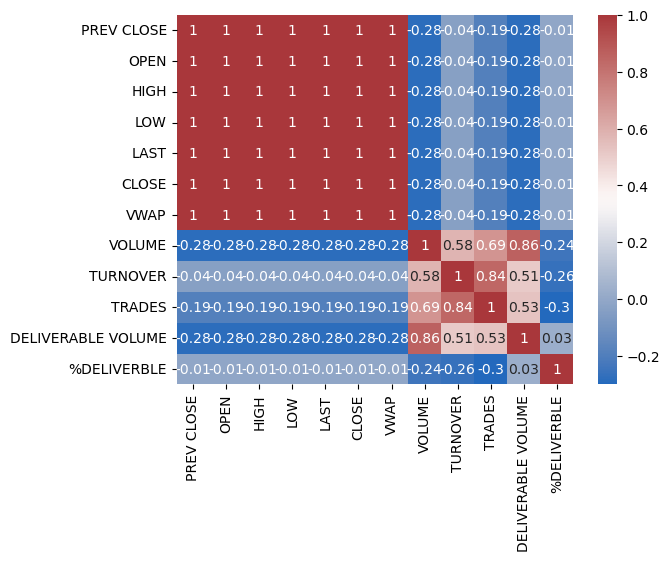

In [5]:
#Find strong correlation between two variables.
sns.heatmap(dataset.corr().round(2),annot=True, cmap='vlag')

array([[<Axes: title={'center': 'PREV CLOSE'}>,
        <Axes: title={'center': 'OPEN'}>,
        <Axes: title={'center': 'HIGH'}>],
       [<Axes: title={'center': 'LOW'}>,
        <Axes: title={'center': 'LAST'}>,
        <Axes: title={'center': 'CLOSE'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'VOLUME'}>,
        <Axes: title={'center': 'TURNOVER'}>],
       [<Axes: title={'center': 'TRADES'}>,
        <Axes: title={'center': 'DELIVERABLE VOLUME'}>,
        <Axes: title={'center': '%DELIVERBLE'}>]], dtype=object)

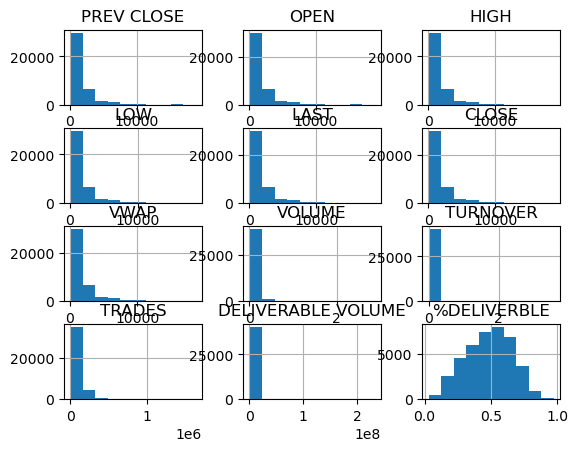

In [6]:
#Plot histograph.
dataset.hist()

In [7]:
# sns.pairplot(dataset)

In [8]:
#Drop unnecessary columns.
dataset = dataset.drop(['SERIES','TURNOVER','TRADES','DELIVERABLE VOLUME','%DELIVERBLE'], axis = 1)

In [9]:
#Using only one company stock data at a time
dataset=dataset.loc[dataset['SYMBOL'] == 'ASIANPAINT']

In [10]:
#Checking dataset size
dataset.shape

(1171, 10)

In [11]:
#Asign Varibale for model
x = dataset[['OPEN','HIGH','LOW']]
y = dataset['CLOSE']

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [12]:
#Import required library to train your model.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,random_state = 100)

In [13]:
#Check train data size
x_train.shape

(878, 3)

In [14]:
#Check test data size.
x_test.shape

(293, 3)

In [15]:
# Check OLS regression report.
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CLOSE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.322e+05
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:54:47   Log-Likelihood:                -3169.5
No. Observations:                 878   AIC:                             6347.
Df Residuals:                     874   BIC:                             6366.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2189      0.942      0.232      0.816      -1.630       2.068
OPEN          -0.5921      0.022    -27.517      0.000      -0.634      -0.550
HIGH           0.7825      0.019     42.189      0.000       0.746       0.819
LOW            0.8099      0.023     34.624      0.000       0.764       0.856
==============================================================================
Omnibus:                       46.770   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.924
Skew:                          -0.227   Prob(JB):                     2.75e-28
Kurtosis:                       4.807   Cond. No.                     8.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Import libraries for Linear Regression. 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [17]:
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
print(regressor.coef_)

[-0.59210963  0.7824804   0.80992533]


In [19]:
print(regressor.intercept_)

0.21889914173402758


In [20]:
predicted = regressor.predict(x_test)

In [21]:
print(x_test)

         OPEN     HIGH      LOW
463   1130.85  1130.85  1115.00
1094  2470.90  2470.90  2400.00
277   1112.00  1126.95  1100.00
484   1189.70  1207.00  1182.40
524   1255.00  1279.85  1253.00
...       ...      ...      ...
817   1537.00  1545.90  1515.25
1127  2578.20  2610.00  2555.00
812   1599.20  1606.75  1590.60
279   1107.00  1123.45  1104.20
374   1186.00  1193.90  1166.00

[293 rows x 3 columns]


In [22]:
dframe = pd.DataFrame(y_test,predicted)

In [23]:
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted, 'res':(y_test-predicted)})

In [24]:
print(dfr)

      Actual Price  Predicted Price        res
463        1120.40      1118.566424   1.833576
1094       2416.45      2414.426819   2.023181
277        1104.55      1114.527137  -9.977137
484        1201.70      1197.895621   3.804379
524        1274.60      1273.415288   1.184712
...            ...              ...        ...
817        1519.75      1527.022199  -7.272199
1127       2602.20      2585.274905  16.925095
812        1603.15      1598.834786   4.315214
279        1120.25      1118.150690   2.099310
374        1171.30      1176.553158  -5.253158

[293 rows x 3 columns]


In [25]:
#Import library for accuracy check.
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
#Check accuracy of model.
regressor.score(x_test,y_test)

0.9996315119572844

In [27]:
import math

In [28]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 6.49733763333636


In [29]:
print('Root Mean Square error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Square error: 9.600828861640244


In [30]:
print('Root Mean Square error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Square error: 9.600828861640244


In [31]:
graph=dfr.head(20)

<Axes: >

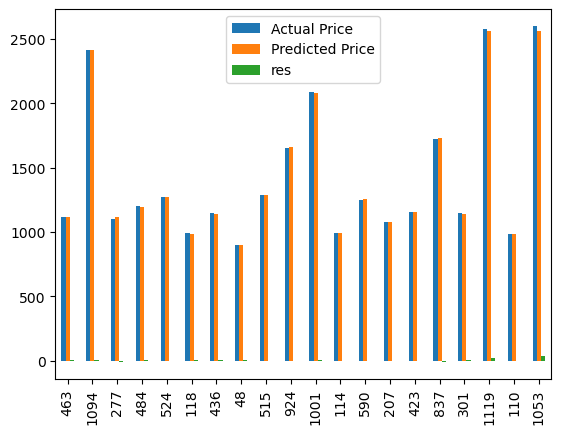

In [32]:
graph.plot(kind='bar')

## Error Terms

Finally, plot your error terms!

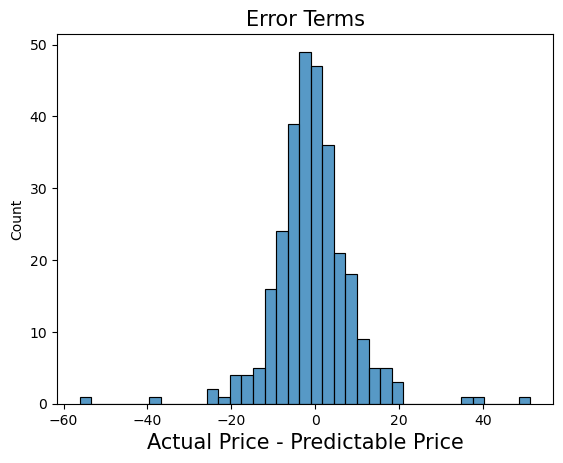

In [33]:
fig = plt.figure()
sns.histplot(dfr['res'])
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Actual Price - Predictable Price', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? - R-squared value is 1
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? - Yes for stock price linear regression model is best.
3. Was your plot of the error terms a bell curve? - Yes.